### Time Series Analysis on Tea Production - ARIMA

#### Setting up the system

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [2]:
# importing the dataset

df = pd.read_csv('nvk_production.csv')
df = df[:297]
df.head()

,Date,GREEN LEAF (Kg),MADE TEA (Kg),NETT OUT TURN,NETT SALE AVERAGE (Rs),LOW GROWN AVERAGE (Rs),DIFFERENCE (Rs),BOUGHT LEAF RATE (Rs)
0,30-Apr-1997,417935,94143.0,22.53,145.17,120.31,24.86,20.76
1,31-May-1997,510033,109461.0,21.46,150.33,129.36,20.97,21.70
2,30-Jun-1997,436533,97275.0,22.28,160.32,135.69,24.63,23.10
3,31-Jul-1997,475422,98949.0,20.81,158.19,131.57,26.62,22.70
4,31-Aug-1997,441680,97419.0,22.06,161.18,138.90,22.28,23.50


#### Data Exploration

In [3]:
df.describe()

,GREEN LEAF (Kg),MADE TEA (Kg),NETT OUT TURN,NETT SALE AVERAGE (Rs),LOW GROWN AVERAGE (Rs),DIFFERENCE (Rs),BOUGHT LEAF RATE (Rs)
count,297.000000,297.000000,297.000000,297.00000,297.000000,297.000000,297.000000
mean,615933.885522,131376.249158,21.416330,411.24101,356.836296,54.404714,57.878586
std,128113.248528,25104.038638,0.769589,209.92397,186.053511,29.202989,29.483497
min,219222.000000,51224.000000,19.510000,145.17000,106.480000,14.570000,20.760000
25%,519651.000000,113342.000000,20.870000,201.09000,165.320000,30.050000,28.050000
50%,623465.000000,133821.000000,21.450000,437.50000,370.870000,48.240000,61.000000
75%,705264.000000,150392.000000,21.870000,552.08000,492.780000,68.720000,78.000000
max,874851.000000,187893.000000,23.730000,939.53000,775.300000,164.230000,130.120000


In [4]:
df.shape

(297, 8)

In [5]:
df.columns

Index(['Date', 'GREEN LEAF (Kg)', 'MADE TEA (Kg)', 'NETT OUT TURN',
       'NETT SALE AVERAGE (Rs)', 'LOW GROWN AVERAGE (Rs)', 'DIFFERENCE (Rs)',
       'BOUGHT LEAF RATE (Rs)'],
      dtype='object')

In [6]:
df.dtypes

Date                       object
GREEN LEAF (Kg)             int64
MADE TEA (Kg)             float64
NETT OUT TURN             float64
NETT SALE AVERAGE (Rs)    float64
LOW GROWN AVERAGE (Rs)    float64
DIFFERENCE (Rs)           float64
BOUGHT LEAF RATE (Rs)     float64
dtype: object

In [7]:
df.isnull().sum()

Date                      0
GREEN LEAF (Kg)           0
MADE TEA (Kg)             0
NETT OUT TURN             0
NETT SALE AVERAGE (Rs)    0
LOW GROWN AVERAGE (Rs)    0
DIFFERENCE (Rs)           0
BOUGHT LEAF RATE (Rs)     0
dtype: int64

#### Data Preprocessing

In [8]:
# handling missing values

df = df.dropna()
df.shape

(297, 8)

In [9]:
# preprocessing the date column

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df = df.asfreq('M')
df.head()

,GREEN LEAF (Kg),MADE TEA (Kg),NETT OUT TURN,NETT SALE AVERAGE (Rs),LOW GROWN AVERAGE (Rs),DIFFERENCE (Rs),BOUGHT LEAF RATE (Rs)
Date,,,,,,,
1997-04-30,417935,94143.0,22.53,145.17,120.31,24.86,20.76
1997-05-31,510033,109461.0,21.46,150.33,129.36,20.97,21.70
1997-06-30,436533,97275.0,22.28,160.32,135.69,24.63,23.10
1997-07-31,475422,98949.0,20.81,158.19,131.57,26.62,22.70
1997-08-31,441680,97419.0,22.06,161.18,138.90,22.28,23.50


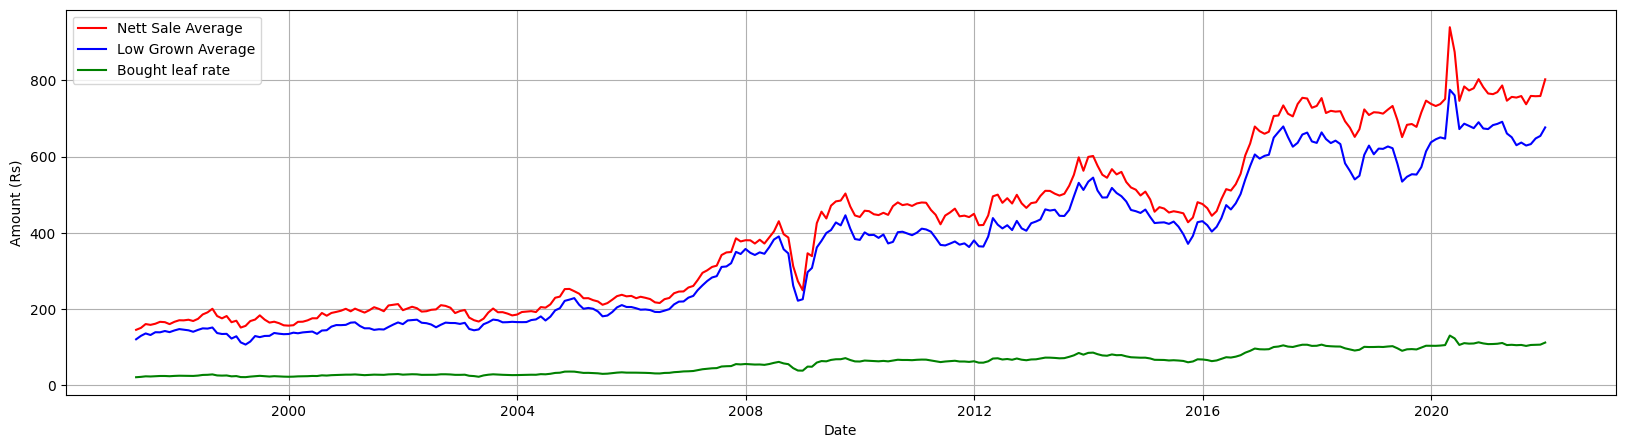

In [10]:
# plotting Nett Sale Average , Low grown average and Price paid per kg for externally purchased green leaf over time

plt.figure(figsize=(20,5))
plt.plot(df['NETT SALE AVERAGE (Rs)'],label = 'Nett Sale Average', color = 'red')
plt.plot(df['LOW GROWN AVERAGE (Rs)'],label = 'Low Grown Average', color = 'blue')
plt.plot(df['BOUGHT LEAF RATE (Rs)'],label = 'Bought leaf rate', color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

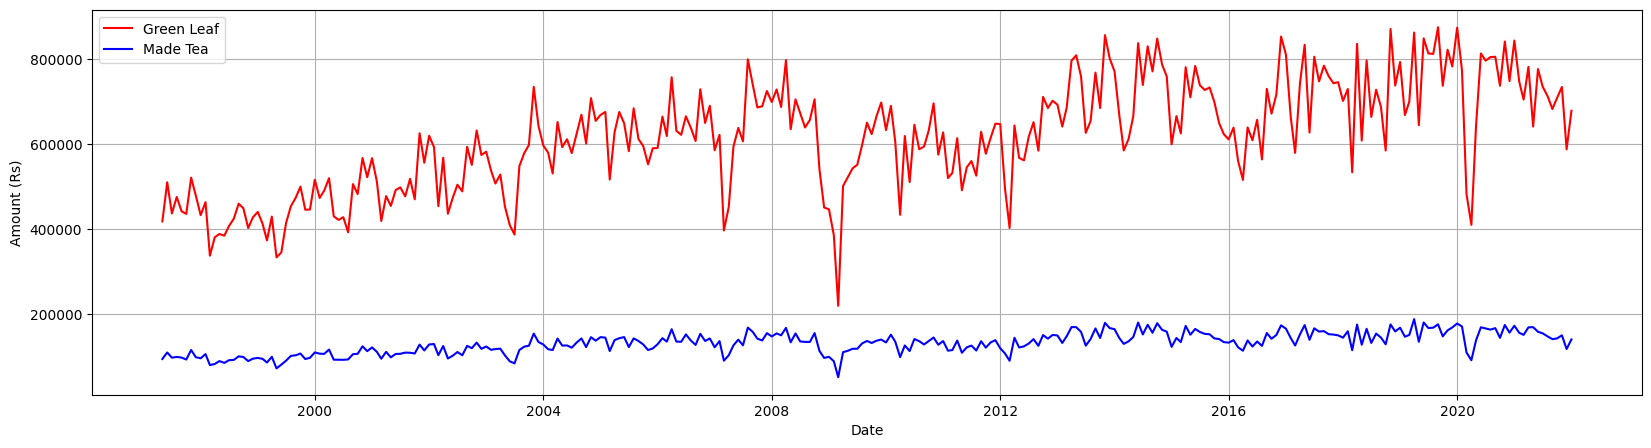

In [11]:
# plotting Green Leaf and Made Tea over time

plt.figure(figsize=(20,5))
plt.plot(df['GREEN LEAF (Kg)'],label = 'Green Leaf', color = 'red')
plt.plot(df['MADE TEA (Kg)'],label = 'Made Tea', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

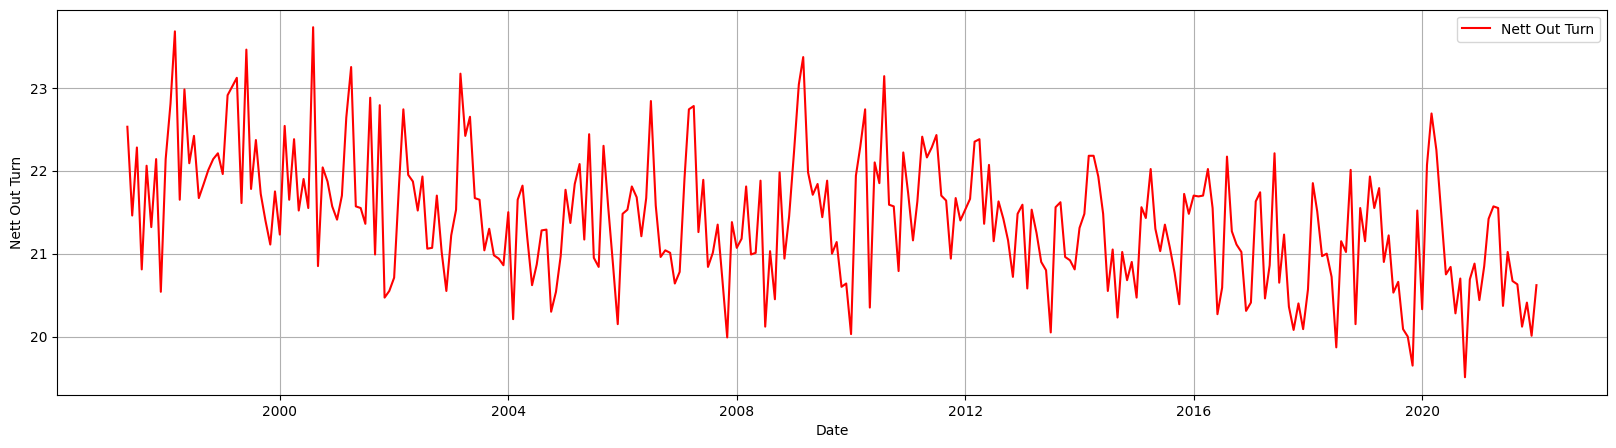

In [12]:
# plotting Nett Out Turn over time

plt.figure(figsize=(20,5))
plt.plot(df['NETT OUT TURN'],label = 'Nett Out Turn', color = 'red')
plt.xlabel('Date')
plt.ylabel('Nett Out Turn')
plt.legend(loc='best')
plt.grid()

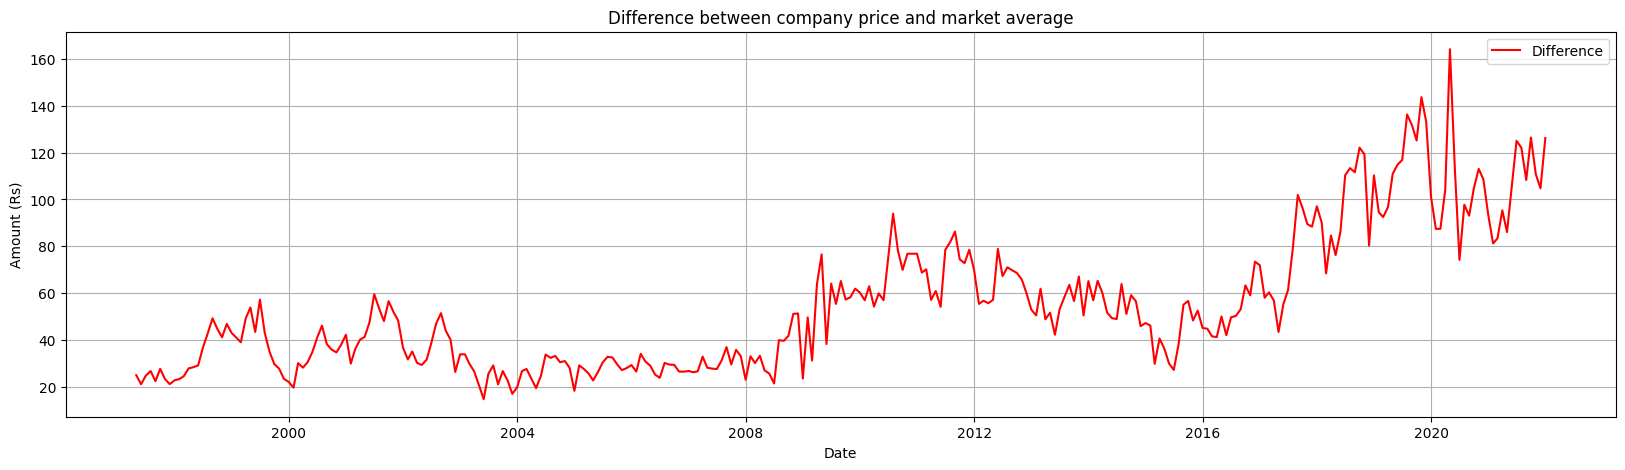

In [13]:
# plotting difference between company price and market average.

plt.figure(figsize=(20,5))
plt.plot(df['DIFFERENCE (Rs)'],label = 'Difference', color = 'red')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.title('Difference between company price and market average')
plt.legend(loc='best')
plt.grid()

In [14]:
# removing outliers

# Set values to NaN at specified dates
dates_to_nullify = pd.to_datetime(['2020-04-30', '2020-05-31'])
df.loc[dates_to_nullify, 'NETT SALE AVERAGE (Rs)'] = pd.NA

# Forward fill the NaN values
df['NETT SALE AVERAGE (Rs)'] = df['NETT SALE AVERAGE (Rs)'].ffill()

# removing war time outliers

# Define date range to set as NaN
start_date = '2008-08-31'
end_date = '2009-02-28'

# Set specified date range in 'Nett sale average' to NaN
df.loc[start_date:end_date, 'NETT SALE AVERAGE (Rs)'] = pd.NA

# Apply forward fill to fill those NaN values
df['NETT SALE AVERAGE (Rs)'] = df['NETT SALE AVERAGE (Rs)'].ffill()

#### Seasonality test

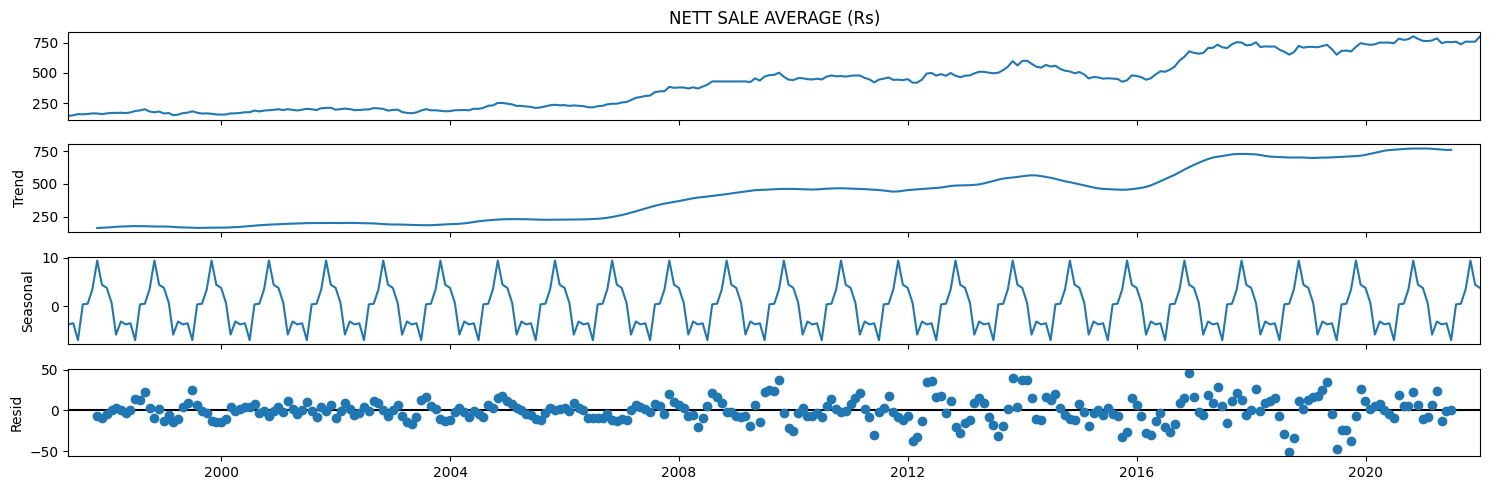

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

snl = seasonal_decompose(df['NETT SALE AVERAGE (Rs)'], model='additive', period=12)

# Create custom-sized plot
fig = snl.plot()
fig.set_size_inches(15, 5)
plt.tight_layout()
plt.show()

The timeseries has annual seasonality.

#### Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

# function to test stationarity

def test_stationarity(timeseries):

    # determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # plotting rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries , label = 'Original', color = 'blue')
    plt.plot(rolmean, label = 'Rolling Mean', color = 'red')
    plt.plot(rolstd, label = 'Rolling Std', color = 'green')
    plt.xlabel('Date')
    plt.ylabel('Rolling Statistics')
    plt.title('Rolling Statistics',size = 15)
    plt.legend()
    plt.grid(True)
    plt.show()

    # dickey fuller test
    print('Results of Dickey Fuller test:\n')
    adf_test = adfuller(timeseries, autolag='AIC')
    output = pd.Series(adf_test[0:4],index = ['Test Statistics', 'p-value','No of lags used','No of Observations'])

    for key,value in adf_test[4].items():
        output['crtical value (%s)' %key] = value
    print(output)

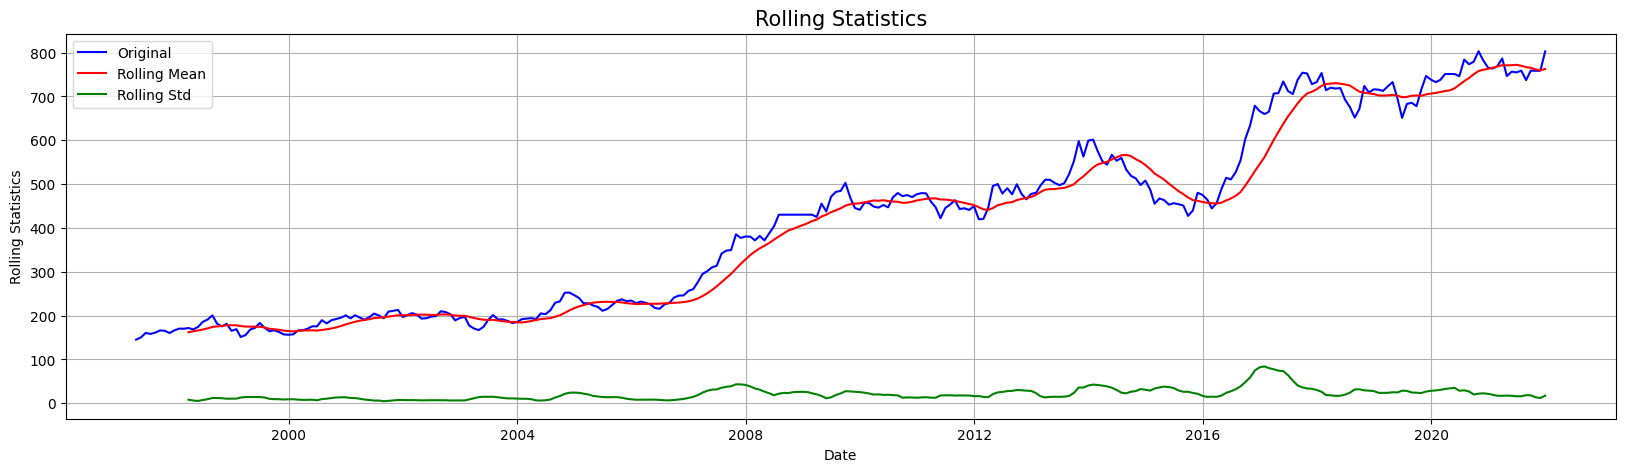

Results of Dickey Fuller test:

Test Statistics          0.060933
p-value                  0.963290
No of lags used          0.000000
No of Observations     296.000000
crtical value (1%)      -3.452637
crtical value (5%)      -2.871354
crtical value (10%)     -2.571999
dtype: float64


In [17]:
test_stationarity(df['NETT SALE AVERAGE (Rs)'])

p>0.05.Therefore,the timeseries is not stationary.

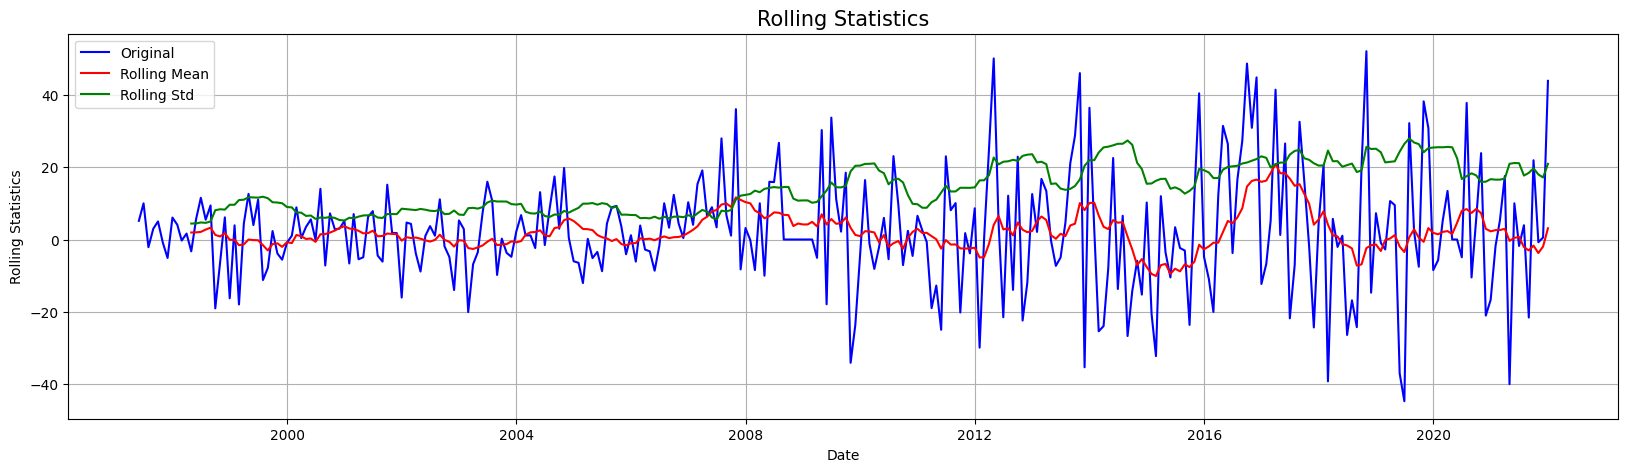

Results of Dickey Fuller test:

Test Statistics       -1.629748e+01
p-value                3.291523e-29
No of lags used        0.000000e+00
No of Observations     2.950000e+02
crtical value (1%)    -3.452713e+00
crtical value (5%)    -2.871388e+00
crtical value (10%)   -2.572017e+00
dtype: float64


In [18]:
# differencing
df_diff = df['NETT SALE AVERAGE (Rs)'].diff().dropna()
test_stationarity(df_diff)

p< 0.05. Therefore, the differenced timeseries is stationary

In [19]:
# splitting training and test data

train_size = int(len(df)*0.8)
test_size = int(len(df) - train_size)

df_train = df[:train_size]
df_test = df[train_size:]

#### ACF and PACF Plots

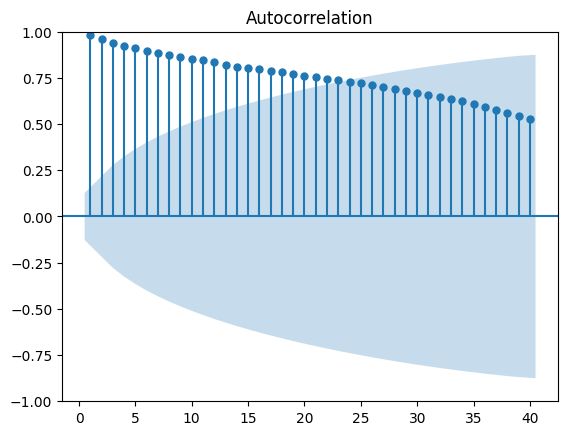

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# acf plot

plot_acf(df_train['NETT SALE AVERAGE (Rs)'],lags=40, zero=False)
plt.show()

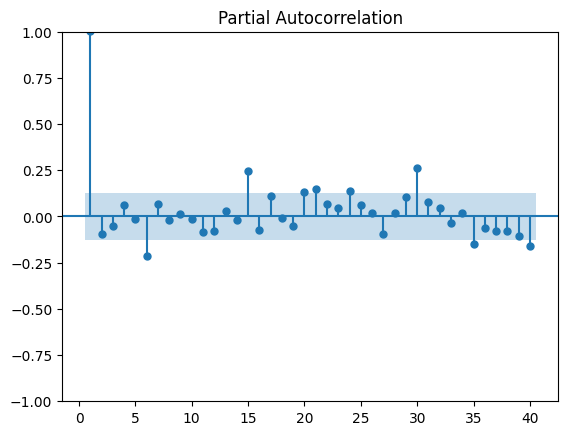

In [21]:
# Pacf plot

plot_pacf(df_train['NETT SALE AVERAGE (Rs)'],lags=40, zero=False, method='ols')
plt.show()

In [22]:
# running grid search to find the best model

# Grid Search

import itertools

# Non-seasonal orders
p = range(0, 2)  # AR order (try 0 to 2)
d = range(0, 1)  # Differencing (0 or 1)
q = range(0, 2)  # MA order (try 0 to 2)

# Seasonal orders (assuming weekly data with yearly seasonality)
P = range(0, 2)  # Seasonal AR
D = range(0, 2)  # Seasonal differencing
Q = range(0, 2)  # Seasonal MA
S = 12          

# Generate all combinations
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [S]))

In [23]:
import warnings

warnings.filterwarnings("ignore")  # Suppress convergence warnings

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(
                df_train['NETT SALE AVERAGE (Rs)'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
            )
            results = model.fit(disp=False)
            
            # Compare AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
                
            print(f"SARIMA{order}x{seasonal_order} - AIC:{results.aic:.2f}")
            
        except:
            continue

print("\nBest SARIMA Model:")
print(f"Order: {best_order}")
print(f"Seasonal Order: {best_seasonal_order}")
print(f"AIC: {best_aic:.2f}")

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3454.09
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3040.52
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2441.06
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2322.35
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2432.15
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2420.18
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2332.32
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2322.98
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:3127.51
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2747.45
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2219.62
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2105.37
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2228.66
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2203.67
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2124.34
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2107.47
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1925.16
SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1840.09
SARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:1971.72
SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:1765.63
SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:1840.22
SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1842.00
SARIMA(1, 0, 0)x(1, 1, 0, 12) - 

#### Running Auto Arima

In [24]:
# running auto arima

model = auto_arima(df_train['NETT SALE AVERAGE (Rs)'],
                   test='adf',
                   m = 12,
                   d=1,
                   D=1,
                   seasonal=True,
                   stepwise=True,
                   trace=True,)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1972.227, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1926.953, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1973.994, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1889.598, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1887.669, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1927.462, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1889.607, Time=0.30 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1891.497, Time=0.66 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1889.4

In [25]:
#training the sarimax model

model = SARIMAX(
    df_train['NETT SALE AVERAGE (Rs)'],
    order = (1,1,1),
    seasonal_order= (0,1,1,12),
    enforce_stationarity= False,
)

results = model.fit(disp=False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:             NETT SALE AVERAGE (Rs)   No. Observations:                  237
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -871.877
Date:                            Mon, 14 Jul 2025   AIC                           1751.753
Time:                                    09:53:24   BIC                           1765.142
Sample:                                04-30-1997   HQIC                          1757.166
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8288      0.174     -4.770      0.000      -1.169      -0.488
ma.L1          0.8838      0.147   

#### Model Validation

In [26]:
# Forecast on test data
forecast_test = results.get_forecast(steps=test_size)
forecast_mean_test = forecast_test.predicted_mean
conf_int_test = forecast_test.conf_int()
fitted_values = results.fittedvalues # predictions for historical data

In [27]:
# Calculate metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(df_test['NETT SALE AVERAGE (Rs)'], forecast_mean_test)
rmse = mean_squared_error(df_test['NETT SALE AVERAGE (Rs)'], forecast_mean_test, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 26.10
RMSE: 33.13


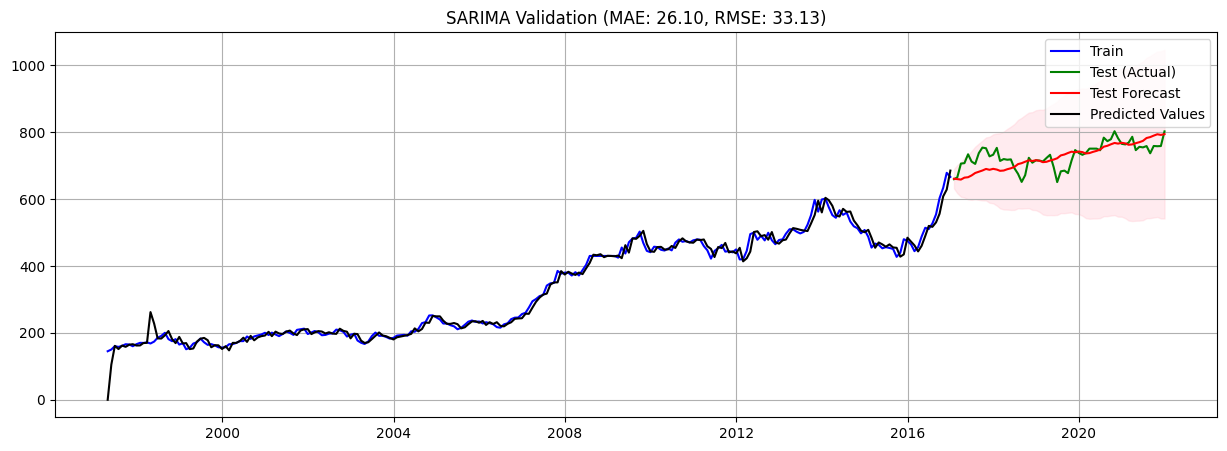

In [28]:
# Plot validation
plt.figure(figsize=(15, 5))
plt.plot(df_train.index, df_train['NETT SALE AVERAGE (Rs)'], label='Train', color='blue')
plt.plot(df_test.index, df_test['NETT SALE AVERAGE (Rs)'], label='Test (Actual)', color='green')
plt.plot(forecast_mean_test.index, forecast_mean_test, label='Test Forecast', color='red')
plt.plot(fitted_values.index, fitted_values, label = 'Predicted Values', color = 'black')
plt.fill_between(conf_int_test.index, conf_int_test.iloc[:, 0], conf_int_test.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f"SARIMA Validation (MAE: {mae:.2f}, RMSE: {rmse:.2f})")
plt.legend()
plt.grid()
plt.show()

#### Forecasting

In [29]:
#training the sarimax model

model = SARIMAX(
    df['NETT SALE AVERAGE (Rs)'],
    order = (1,1,1),
    seasonal_order= (0,1,1,12),
    enforce_stationarity= False,
)

results = model.fit(disp=False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:             NETT SALE AVERAGE (Rs)   No. Observations:                  297
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1144.028
Date:                            Mon, 14 Jul 2025   AIC                           2296.055
Time:                                    09:53:26   BIC                           2310.449
Sample:                                04-30-1997   HQIC                          2301.835
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7316      0.274     -2.666      0.008      -1.270      -0.194
ma.L1          0.7852      0.244   

In [30]:
# forecasting next 12 months

forecast = results.get_forecast(steps=60)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
fitted_values = results.fittedvalues # predictions for historical data

In [31]:
forecast_mean

2022-01-31    801.671680
2022-02-28    795.675190
2022-03-31    804.056026
2022-04-30    803.916791
2022-05-31    805.983467
2022-06-30    799.623319
2022-07-31    809.926706
2022-08-31    809.373926
2022-09-30    817.466269
2022-10-31    829.806474
2022-11-30    828.193816
2022-12-31    833.168383
2023-01-31    831.561187
2023-02-28    825.922375
2023-03-31    834.041523
2023-04-30    834.093747
2023-05-31    836.020346
2023-06-30    829.762683
2023-07-31    839.991088
2023-08-31    839.493167
2023-09-30    847.545374
2023-10-31    859.914943
2023-11-30    858.280801
2023-12-31    863.271087
2024-01-31    861.652391
2024-02-29    856.021992
2024-03-31    864.134985
2024-04-30    864.191712
2024-05-31    866.115016
2024-06-30    859.859764
2024-07-31    870.086405
2024-08-31    869.589775
2024-09-30    877.641037
2024-10-31    890.011298
2024-11-30    888.376650
2024-12-31    893.367306
2025-01-31    891.748339
2025-02-28    886.118138
2025-03-31    894.230986
2025-04-30    894.287819


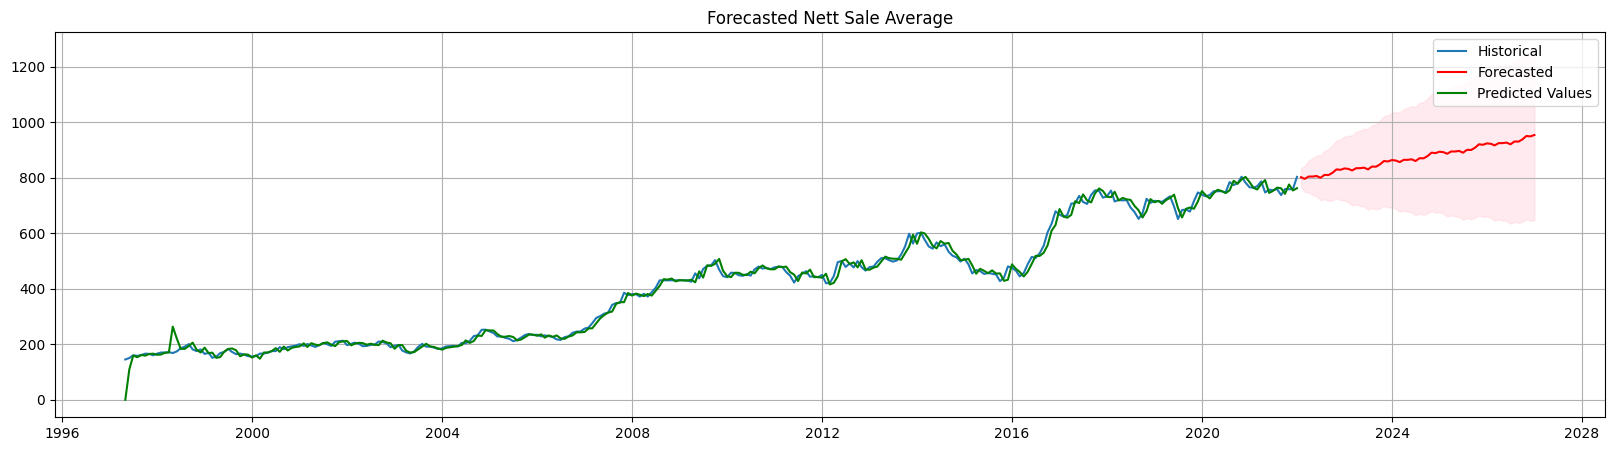

In [32]:
# plot

plt.figure(figsize=(20,5))
plt.plot(df['NETT SALE AVERAGE (Rs)'], label = 'Historical')
plt.plot(forecast_mean.index , forecast_mean,label = 'Forecasted', color = 'red')
plt.plot(fitted_values.index, fitted_values, label = 'Predicted Values', color = 'green')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:,0],
    confidence_intervals.iloc[:,1],
    color = 'pink',
    alpha = 0.3
)

plt.title('Forecasted Nett Sale Average')
plt.legend()
plt.grid()
plt.show()